In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as py

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot



In [12]:
df = pd.read_csv("covid.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91


In [30]:
korea_df = df[df['Country/Region'] == 'South Korea']
korea_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20
33,NaN,South Korea,37.5665,126.978,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204


In [31]:
korea_df=korea_df.T[4:].reset_index()
korea_df

,index,33
0,1/22/20,1
1,1/23/20,1
2,1/24/20,2
3,1/25/20,2
4,1/26/20,3
5,1/27/20,4
6,1/28/20,4
7,1/29/20,4
8,1/30/20,4
9,1/31/20,11


In [36]:
korea_df.columns = ['date', 'confirmed']
korea_df['date'] = pd.to_datetime(korea_df['date'])
korea_df

,date,confirmed
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
5,2020-01-27,4
6,2020-01-28,4
7,2020-01-29,4
8,2020-01-30,4
9,2020-01-31,11


In [47]:
korea_df = korea_df.append([
   {'date' : pd.to_datetime('2020-02-22'), 'confirmed':433},
   {'date' : pd.to_datetime('2020-02-23'), 'confirmed': 568},                         
], ignore_index=True)

In [48]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=korea_df.date,
        y=korea_df.confirmed,
        name='Confirmed in Korea'
    )
)

In [49]:
prophet_df = korea_df.rename(columns={
    'date': 'ds',
    'confirmed': 'y' 
})

prophet_df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
5,2020-01-27,4
6,2020-01-28,4
7,2020-01-29,4
8,2020-01-30,4
9,2020-01-31,11


In [50]:
model = Prophet(
    yearly_seasonality = False,
    weekly_seasonality=False,
    daily_seasonality=True,
    seasonality_mode='additive'
)

model.fit(prophet_df)

predict = model.make_future_dataframe(periods=7)

predict.tail(7)

,ds
33,2020-02-24
34,2020-02-25
35,2020-02-26
36,2020-02-27
37,2020-02-28
38,2020-02-29
39,2020-03-01


In [51]:
forecast = model.predict(predict)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
33,2020-02-24,177.212353,51.578622,305.845745
34,2020-02-25,184.387581,55.177600,310.310022
35,2020-02-26,191.562809,61.943489,325.523774
36,2020-02-27,198.738036,65.898014,319.242913
37,2020-02-28,205.913264,80.209068,334.636488
38,2020-02-29,213.088492,89.067221,346.800702
39,2020-03-01,220.263719,90.772485,351.487858


In [52]:
fig = plot_plotly(model, forecast)
py.iplot(fig)

In [53]:
model = Prophet(
    changepoint_prior_scale=0.2,
    changepoint_range=0.98,
    yearly_seasonality = False,
    weekly_seasonality=False,
    daily_seasonality=True,
    seasonality_mode='additive'
)

model.fit(prophet_df)

predict = model.make_future_dataframe(periods=7)
forecast = model.predict(predict)



fig = plot_plotly(model, forecast)
py.iplot(fig)

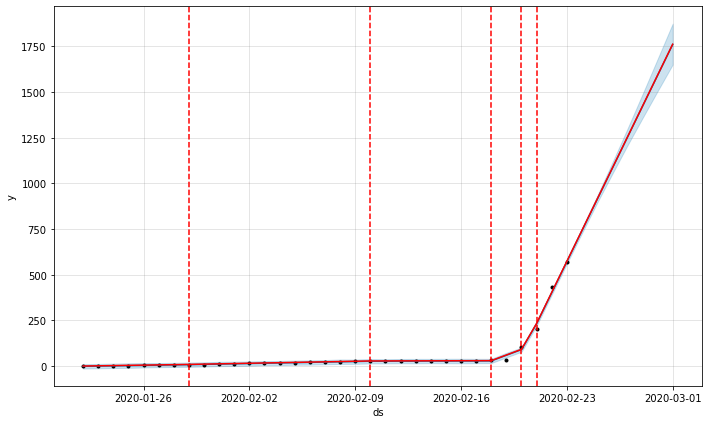

In [54]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)